<a href="https://colab.research.google.com/github/BrianKipngeno/Mchezopesa-ltd-prediction-model/blob/main/Mchezopesa_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Football Analysis

## Context 

> Fifa World Ranking is a ranking system for men and women national football teams . The Fédération Internationale de Football Association(FIFA) which is the worlds football governingv body organizes the  rankings based on the game results with the most successful teams being ranked highest. A point system is used, points being awarded based on the results of all FIFA recognized international matches.

## Problem Statement

>As a data scientist at Mchezopesa Ltd, make a prediction of a game between team 1 and team 2 , based on who's home and who's away and on whether or not the game is friendly.
>### Result Prediction : Polynomial Approach 
>
>$ Model$ $1$ $:$ $Predict$ $how$ $many$ $goals$ $the$
$home$ $team$ $scores$
>
>$Model$ $2$ $:$ $Predict$ $how$ $many$ $goals$ $the$ $away$ $team$ $scores$ 
>
>
>### Classify Match Outcome : Logistic Approach
> Figure as out and classify from the home teams perspective if a game between two teams results in a win, loss or a draw.


## Research Design

>The following are the assumptions that must be satisfied in
order to use the true experiment research design :
>
> - Control group and experimental group
> - Researcher - manipulated variable(s)
> - Random distribution

## Metrics for Success

> - An RMSE score that is less than 10% of the target mean
> - An accuracy score of 80% and above

## Project Plan

> This project was carried out using the following procession:
>
> 1. Understanding the context of the business and 
> 2. Definition of the problem statement .
> 3. Determining the metrics for evaluation.
> 4. Collection of data
> 5. Exploratory Data Analysis.
> 6. Data preparation and cleaning.
> 7. Implementing the solution:
> 8. Prediction
> 9. Evaluation of the solution
> 11. Challenging the solution
> 12. Summary of findings
> 13. Conclusion

## Loading Our Libraries and Files

### Importing Our Libraries

In [ ]:
# Lets load all the necessary libraries for our workflow.
#
# Analysis libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Machine learning libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

# Other libraries
import datetime as dt


In [ ]:
# Loading the files to our environment
#
fifa_ranks = pd.read_csv('fifa_ranking.csv')

match_results = pd.read_csv('results.csv')

## Data Cleaning

In [ ]:
# Displaying the first five records of the ranking dataset

fifa_ranks.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# Displaying the last 5 records of the ranking dataset
#
fifa_ranks.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
# Exhibiting the first few rows of the results dataset

match_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Lets display the last few rows of the results dataset

match_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Lets check the shapes of our datasets and display the results

print('The ranking dataset has ', fifa_ranks.shape[0],' rows and ', fifa_ranks.shape[1],' columns')
print('The results dataset has ', match_results.shape[0], ' rows and ', match_results.shape[1], ' columns')

The ranking dataset has  57793  rows and  16  columns
The results dataset has  40839  rows and  9  columns


In [ ]:
# The following line of code will show us if there are any duplicate records in our datasets
#
print('Ranking data duplicates : ', fifa_ranks.duplicated().sum())
print('Results data duplicates : ', match_results.duplicated().sum())

Ranking data duplicates :  37
Results data duplicates :  0




*   The FIFA ranking data contains 37 duplicate rows.


In [ ]:
# We will now drop the duplicate rows from our ranking data except for the first occurrence

fifa_ranked = fifa_ranks.drop_duplicates(keep = 'first')

In [ ]:
# Now we check for the number of rows that have been dropped
#
print('Fifa Ranking Data : ', fifa_ranks.shape[0] - fifa_ranked.shape[0] , 'rows have been dropped')

Fifa Ranking Data :  37 rows have been dropped


In [ ]:
# Lets check for null values in the ranking dataset

fifa_ranked.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

- The ranking dataset has no missing values

In [ ]:
# Checking for null values in the results dataset

match_results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

- The match results dataset has no missing values either.

In [ ]:
# We will use a for loop to iterate through the columns 
# while checking for the number of unique values in each column.
#
# Number of unique values in the fifa ranking dataset

print('Cardinality of ranking dataset columns:\n')

for i in fifa_ranked.columns:
  print(f'{i:<23} : {fifa_ranked[i].nunique()}')
  
# Number of unique values of the columns in the match results dataset
#

print('\nCardinatity of the match results dataset columns:\n')
for j in match_results.columns:
  print(f'{j :<10} : {match_results[j].nunique()}')
   

Cardinality of ranking dataset columns:

rank                    : 209
country_full            : 216
country_abrv            : 216
total_points            : 11114
previous_points         : 1557
rank_change             : 121
cur_year_avg            : 7419
cur_year_avg_weighted   : 7419
last_year_avg           : 7473
last_year_avg_weighted  : 7001
two_year_ago_avg        : 7575
two_year_ago_weighted   : 6513
three_year_ago_avg      : 7628
three_year_ago_weighted : 5849
confederation           : 6
rank_date               : 286

Cardinatity of the match results dataset columns:

date       : 15115
home_team  : 309
away_team  : 306
home_score : 26
away_score : 22
tournament : 109
city       : 1960
country    : 266
neutral    : 2


- From the ranking dataset, the confederation column has low cardinality and from the match results dataset, the neutral column has a low cardinality as well. We will then proceed to check the column datatypes bfore we decide whether or not we will drop these columns.

In [ ]:
# First we check for the datatypes of the ranking data columns
#

print('Datatypes of FIFA ranking data columns:\n\n', fifa_ranked.dtypes)

# Checking the datatypes of the match results data columns
#
print('\nDatatypes of results data columns: \n\n', match_results.dtypes)


Datatypes of FIFA ranking data columns:

 rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

Datatypes of results data columns: 

 date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


- In both dataframes, the date columns have to be converted from the object format to datetime datatype before working on these columns.

- The neutral column has a boolean datatype and the confederation column is an object column hence we can still work with these columns despite them having low cardinality.

In [ ]:
fifa_ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
match_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Creating a datetime object on the rank_date column in the ranking dataset and the date column in the results dataset
#

fifa_ranked.rank_date = pd.to_datetime(fifa_ranked.rank_date)
match_results.date = pd.to_datetime(match_results.date)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# Now checking the dtypes to confirm that the datetime objects have been created \
#

print('Datatypes of FIFA ranking data columns:\n\n', fifa_ranked.dtypes)

# Checking the datatypes of the match results data columns
#
print('\nDatatypes of results data columns: \n\n', match_results.dtypes)


Datatypes of FIFA ranking data columns:

 rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

Datatypes of results data columns: 

 date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
n

- Awesome! We have successfully changed the datatypes of the time columns to datetime.

In [ ]:
# Now to create new columns and split the date colums into month and year.
#
# For the year columns

fifa_ranked['year'] = fifa_ranked.rank_date.dt.year
match_results['year'] = match_results.date.dt.year

# Now for the month columns

fifa_ranked['month'] = fifa_ranked.rank_date.dt.month
match_results['month'] = match_results.date.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Viewing the ranking dataframe

fifa_ranked.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [ ]:
match_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [ ]:
match_results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

In [ ]:
fifa_ranked.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [ ]:
fifa_ranked.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


#### Data Integration

- We will now merge the two datasets to form our analysis dataset.
- We will use an inner merge/join as we want to keep only the rows exist on the columns common to both dataframes.

In [ ]:
# We now merge the two datasets for form one that we will use for analysis

fifa_home = pd.merge(match_results, fifa_ranked,  left_on = ['home_team', 'year', 'month'], right_on = ['country_full', 'year', 'month'],  how = 'inner' )

fifa_home.shape
print('Our FIFA home dataset has ', fifa_home.shape[0], 'rows and ', fifa_home.shape[1], 'columns')

Our FIFA home dataset has  18593 rows and  27 columns


In [ ]:
_# Merging the ranking dataset to the result dataset on the away_team, year and month columns

fifa_away = pd.merge(match_results, fifa_ranked, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'country_full'])

print('Our FIFA away dataset has ', fifa_away.shape[0], 'rows and ', fifa_away.shape[1], 'columns')

Our FIFA away dataset has  18502 rows and  27 columns


In [ ]:
# Number of countries in the home dataset
#
fifa_home.country_abrv.nunique()

193

In [ ]:
# Lets check the number of countries in the away dataset
#
fifa_away.country_abrv.nunique()

194

In [ ]:
# Renaming the ranks columns to get the home team and away team ranks
#
fifa_home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
fifa_away.rename({'rank' : 'away_rank'}, axis =1, inplace = True)

In [ ]:
fifa_home.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
fifa_away.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'away_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
away_ranks = fifa_away[['away_team','away_rank','year','month']]
away_ranks.head()

#away_ranks.shape

,away_team,away_rank,year,month
0,Paraguay,67,1993,8
1,Paraguay,67,1993,8
2,Argentina,5,1993,8
3,Argentina,5,1993,8
4,Argentina,5,1993,8


In [ ]:
fifa_df = pd.merge(fifa_home, away_ranks, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

fifa_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5


In [ ]:
print(fifa_df.shape, '\n')
print('Presence of duplicated records: ', fifa_df.duplicated().sum(), '\n')
print('Number of duplicate records: ', fifa_df.duplicated().sum())

(28439, 28) 

Presence of duplicated records:  11535 

Number of duplicate records:  11535


In [ ]:
# viewing the duplicate rows

a = fifa_df.duplicated()
fifa_df[a].head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
5,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5
6,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5
8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5


In [ ]:
fifa_df.shape

(28439, 28)

In [ ]:
# Dropping duplicate rows from the dataset
#
fifa_df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
# Resetting the index column after dropping duplicate values
fifa_df.reset_index(drop = True, inplace = True)

In [ ]:
fifa_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
16899,2018-06-18,Tunisia,England,1,2,FIFA World Cup,Volgograd,Russia,True,2018,6,21,Tunisia,TUN,909.91,1012,-7,545.56,545.56,394.79,197.39,227.59,68.28,493.39,98.68,CAF,2018-06-07,12
16900,2018-06-12,Japan,Paraguay,4,2,Friendly,Innsbruck,Austria,True,2018,6,61,Japan,JPN,520.75,528,-1,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,2018-06-07,32
16901,2018-06-28,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,2018,6,61,Japan,JPN,520.75,528,-1,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,2018-06-07,8
16902,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,2018,6,5,Argentina,ARG,1241.45,1254,0,404.07,404.07,809.59,404.80,829.98,248.99,917.94,183.59,CONMEBOL,2018-06-07,22
16903,2018-06-22,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,2018,6,48,Nigeria,NGA,617.79,635,-1,251.21,251.21,474.22,237.11,198.21,59.46,350.01,70.00,CAF,2018-06-07,22


In [ ]:
fifa_df.isnull().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
year                       0
month                      0
home_rank                  0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
away_rank                  0
dtype: int64

In [ ]:
fifa_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'away_rank'],
      dtype='object')

In [ ]:
fifa_df.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67


In [ ]:
fifa_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'away_rank'],
      dtype='object')

In [ ]:
fifa_df1 = fifa_df.drop(["date","country_abrv",'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'rank_date', 'two_year_ago_weighted',	"three_year_ago_avg","three_year_ago_weighted"],axis=1,inplace=True)

In [ ]:
fifa_df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'home_rank',
       'country_full', 'total_points', 'previous_points', 'rank_change',
       'confederation', 'away_rank'],
      dtype='object')

In [ ]:
fifa_df.to_csv('fifa_dataset.csv')

In [ ]:
fifa = pd.read_csv('fifa_dataset.csv')

In [ ]:
fifa.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'away_rank'],
      dtype='object')

In [ ]:
fifa.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,total_points,previous_points,rank_change,confederation,away_rank
0,0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,0.0,36,16,CONMEBOL,67
1,1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,0.0,51,5,CONMEBOL,67
2,2,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,0.0,36,16,CONMEBOL,5
3,3,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,0.0,16,8,CONMEBOL,5
4,4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,67,Paraguay,0.0,22,1,CONMEBOL,5


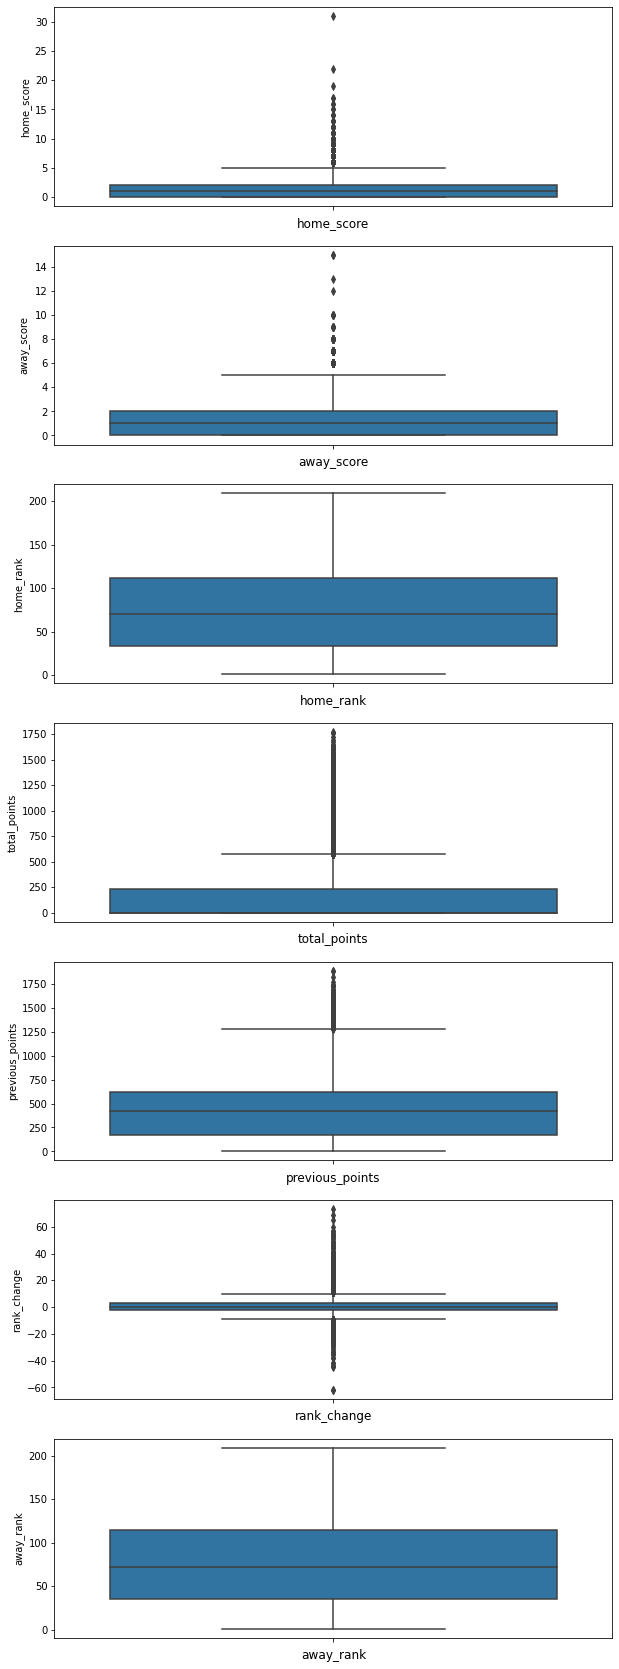

In [ ]:
# Checking for anomalies.

numerical_columns = ['home_score', 'away_score', 'home_rank', 'total_points', 'previous_points', 'rank_change','away_rank']
fig, ax = plt.subplots(len(numerical_columns), figsize=(10,30))

for i, col_val in enumerate(numerical_columns):

    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=12);

plt.show();

we retain the outliers since they might be useful in our analysis

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Non-Grahical Univariate EDA

In [ ]:
fifa.describe()

,Unnamed: 0,home_score,away_score,year,month,home_rank,total_points,previous_points,rank_change,away_rank
count,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000
mean,8451.500000,1.603999,1.068268,2006.490771,6.877307,76.056377,165.794733,435.065783,0.936583,78.918836
std,4879.908811,1.615409,1.245122,6.803461,3.273882,50.833721,313.589797,319.215750,6.851801,52.027710
min,0.000000,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,-62.000000,1.000000
25%,4225.750000,0.000000,0.000000,2001.000000,4.000000,33.000000,0.000000,174.000000,-2.000000,35.000000
50%,8451.500000,1.000000,1.000000,2007.000000,7.000000,70.000000,0.000000,417.000000,0.000000,72.000000
75%,12677.250000,2.000000,2.000000,2012.000000,10.000000,112.000000,230.425000,617.000000,3.000000,115.000000
max,16903.000000,31.000000,15.000000,2018.000000,12.000000,209.000000,1770.060000,1887.000000,73.000000,209.000000


In [ ]:
fifa.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'away_rank'],
      dtype='object')

In [ ]:
# Finding the mean
fifa[['home_score', 'away_score', 'home_rank', 'total_points', 'previous_points', 'rank_change','away_rank']].mean()

home_score           1.603999
away_score           1.068268
home_rank           76.056377
total_points       165.794733
previous_points    435.065783
rank_change          0.936583
away_rank           78.918836
dtype: float64

In [ ]:
# Finding the standard deviation
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: '+ str(fifa[column].std()))
  print(column + ', Variance: '+ str(fifa[column].var()))
  print(column + ', Skewness: '+ str(fifa[column].skew()))
  print(column + ', Kurtosis: '+ str(fifa[column].kurt()))



home_score, Standard deviation: 1.615409176069175
home_score, Variance: 2.6095468061284905
home_score, Skewness: 2.325263453272794
home_score, Kurtosis: 15.255526287122311


away_score, Standard deviation: 1.2451222675808964
away_score, Variance: 1.5503294612257932
away_score, Skewness: 1.9290116550008902
away_score, Kurtosis: 7.168342797190049


home_rank, Standard deviation: 50.833720736999766
home_rank, Variance: 2584.06716396728
home_rank, Skewness: 0.4473319789987528
home_rank, Kurtosis: -0.6878691832165451


total_points, Standard deviation: 313.58979667695155
total_points, Variance: 98338.5605798918
total_points, Skewness: 2.095075126175713
total_points, Kurtosis: 3.9339329931638307


previous_points, Standard deviation: 319.2157500418507
previous_points, Variance: 101898.69507478131
previous_points, Skewness: 0.7896922722712338
previous_points, Kurtosis: 0.6886379240653864


rank_change, Standard deviation: 6.851800504212443
rank_change, Variance: 46.94717014952589
rank_chang

In [ ]:
# Interquantile range

for column in numerical_columns:
  print('\n')
  print(fifa[column].quantile([0.25, 0.5, 0.75]))



0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64


0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


0.25     33.0
0.50     70.0
0.75    112.0
Name: home_rank, dtype: float64


0.25      0.000
0.50      0.000
0.75    230.425
Name: total_points, dtype: float64


0.25    174.0
0.50    417.0
0.75    617.0
Name: previous_points, dtype: float64


0.25   -2.0
0.50    0.0
0.75    3.0
Name: rank_change, dtype: float64


0.25     35.0
0.50     72.0
0.75    115.0
Name: away_rank, dtype: float64


#### Graphical Univariate EDA

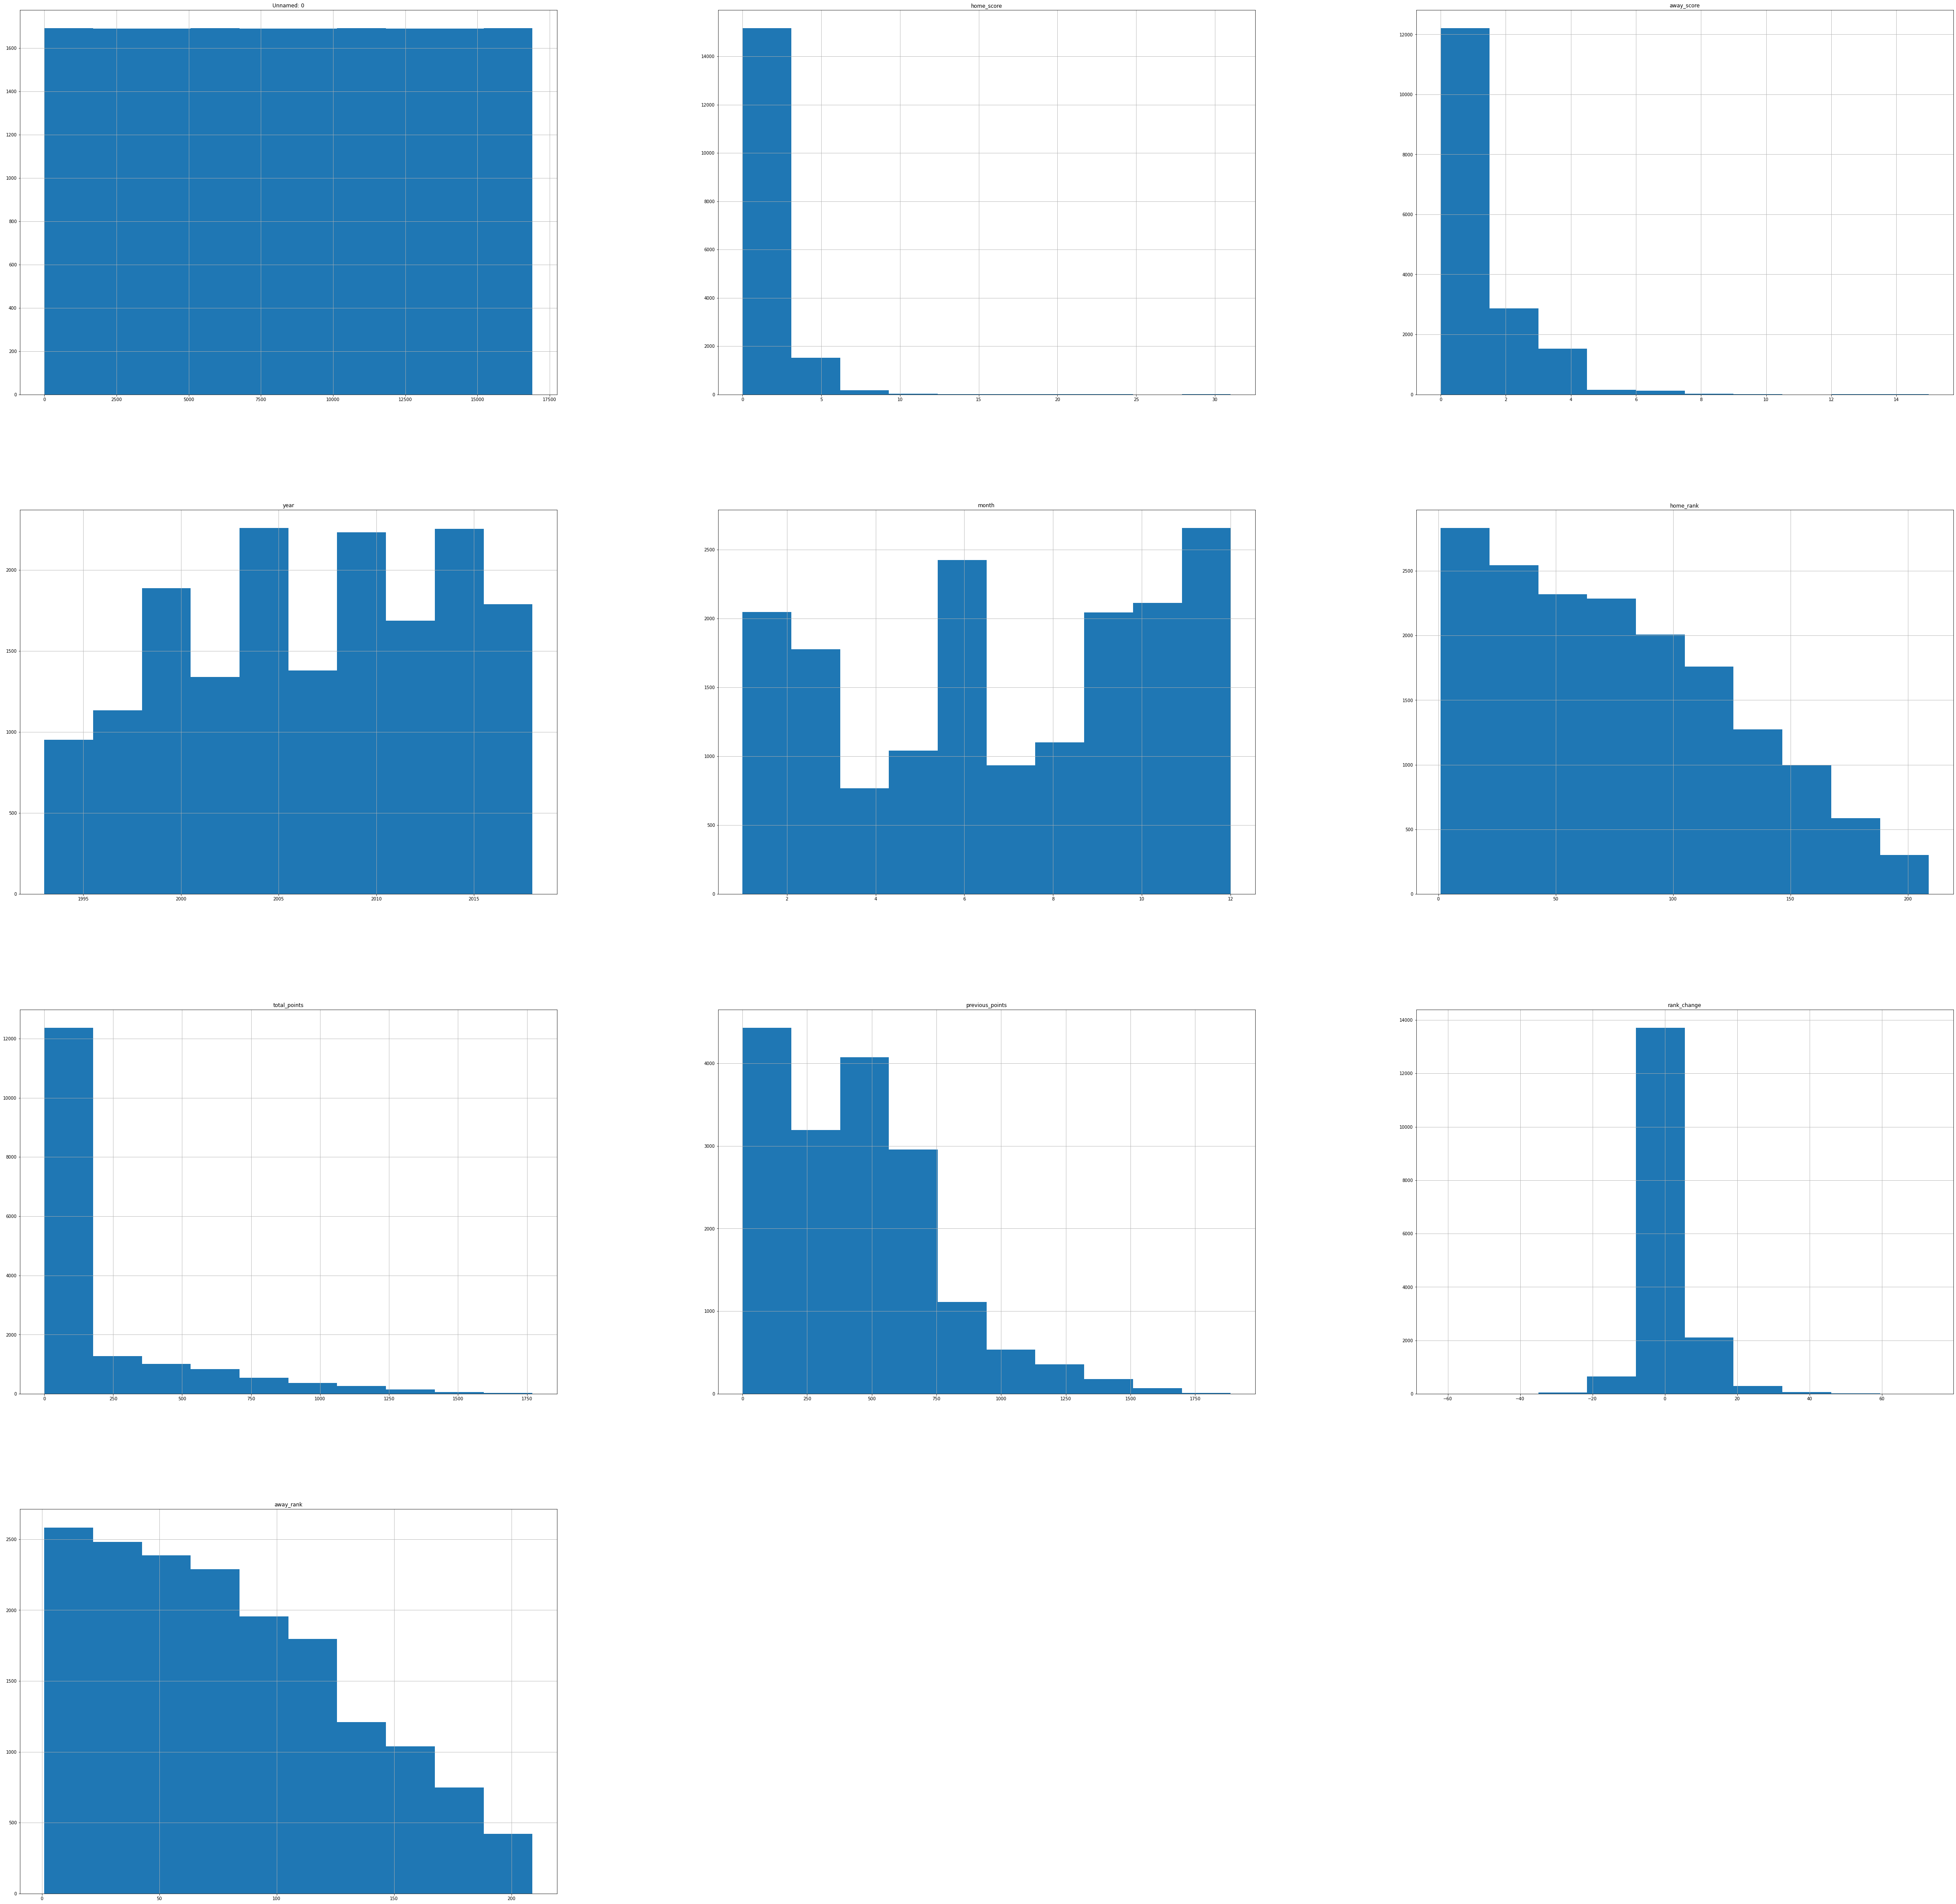

In [ ]:
# Histograms
fifa.hist(figsize=(80,80), sharex=False, sharey=False, xlabelsize= 10, ylabelsize=10)
plt.show()

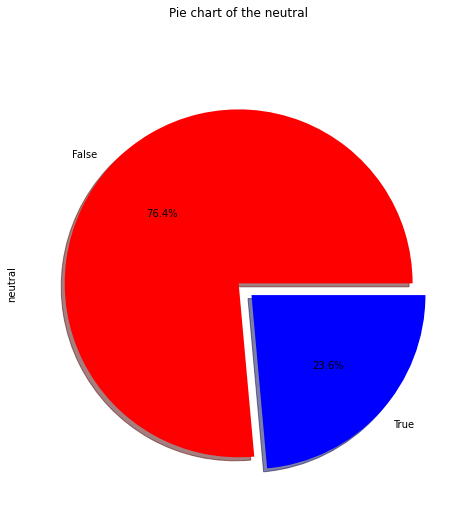

In [ ]:
# Pie chart for neutral
fifa['neutral'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['r','b'],figsize=(10,8),autopct='%1.1f%%')
plt.title("Pie chart of the neutral", y=1.1)
plt.show()

76.4% of the games were not played at a neutral location while 23.6% were bplayed at aneutral location

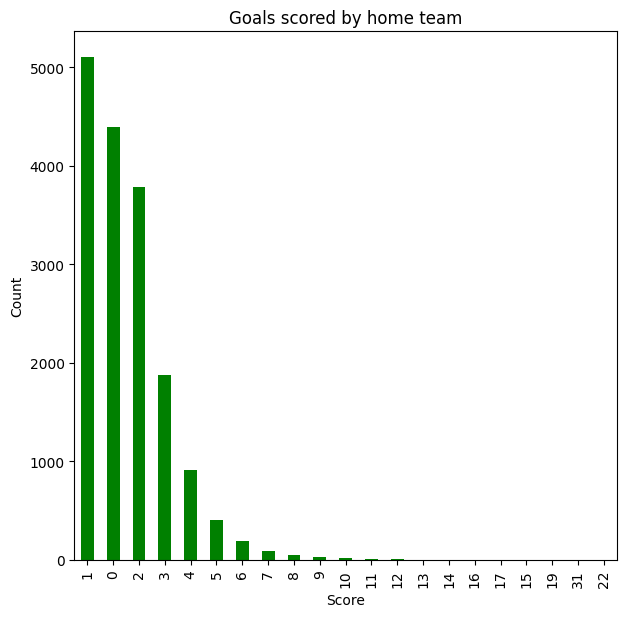

In [ ]:
#creating a bar graph of the home score
plt.figure(figsize = (7,7), dpi = 100)
fifa.home_score.value_counts().plot(kind= 'bar',color='green')
plt.title('Goals scored by home team')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

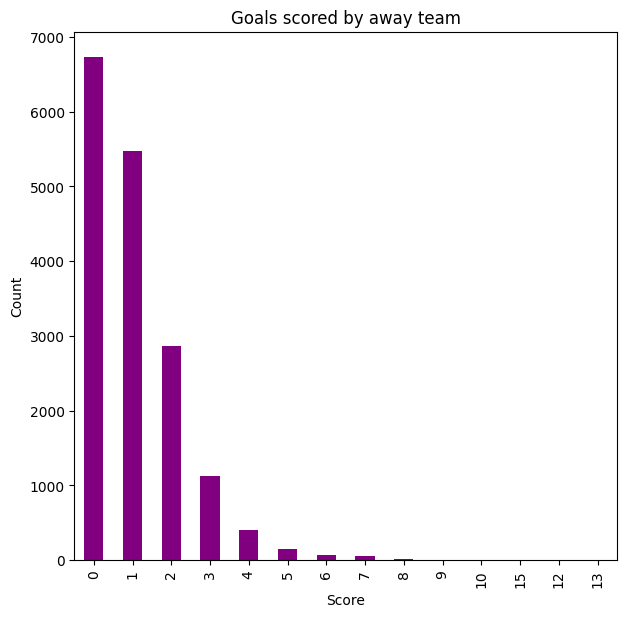

In [ ]:
#creating a bar graph of the away score
plt.figure(figsize = (7,7), dpi = 100)
fifa.away_score.value_counts().plot(kind= 'bar',color='purple')
plt.title('Goals scored by away team')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

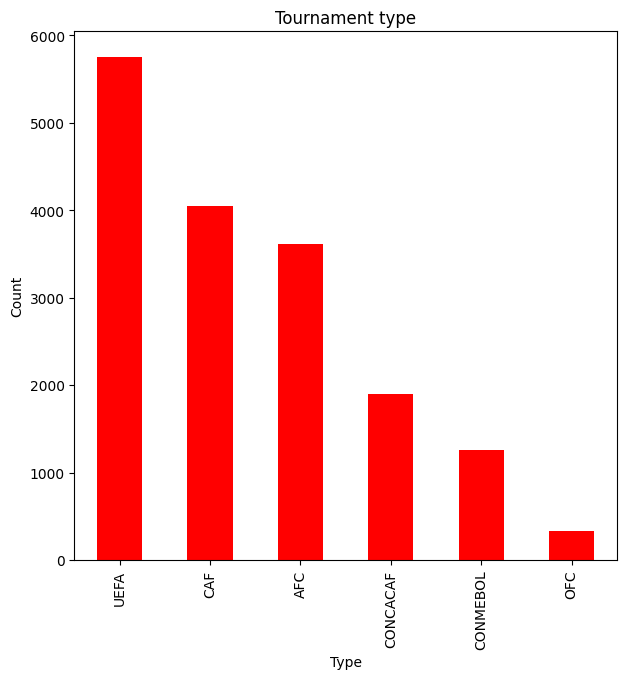

In [ ]:
#creating a bar graph of the tournament sponsor
plt.figure(figsize = (7,7), dpi = 100)
fifa.confederation.value_counts().plot(kind= 'bar',color='red')
plt.title('Tournament type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Most of the games played were under UEFA

BIVARIATE ANALYSIS

In [ ]:
fifa.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'away_rank'],
      dtype='object')

In [ ]:
fifa.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'away_rank'],
      dtype='object')

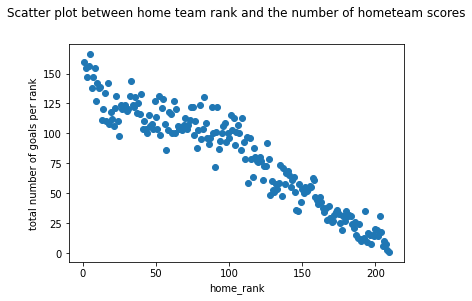

In [ ]:
#creating a scatter plot for total number of goals per rank
grp=fifa.groupby('home_rank')['home_score'].count().reset_index(name='total number of goals per rank')
plt.scatter(grp["home_rank"] , grp['total number of goals per rank'])
plt.title("Scatter plot between home team rank and the number of hometeam scores", y=1.1)
plt.xlabel('home_rank')
plt.ylabel('total number of goals per rank')
plt.show()

home rank increases the number of home team scores reduces

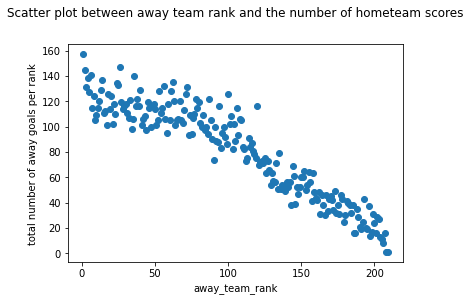

In [ ]:
#creating a scatter plot for total number of goals per rank
grp=fifa.groupby('away_rank')['away_score'].count().reset_index(name='total number of away goals per rank')
plt.scatter(grp["away_rank"] , grp['total number of away goals per rank'])
plt.title("Scatter plot between away team rank and the number of hometeam scores", y=1.1)
plt.xlabel('away_team_rank')
plt.ylabel('total number of away goals per rank')
plt.show()

away rank increases the number of away team scores reduces

In [ ]:
fifa.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'away_rank'],
      dtype='object')

In [ ]:
fifa.head(1)

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,total_points,previous_points,rank_change,confederation,away_rank
0,0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,0.0,36,16,CONMEBOL,67


In [ ]:
#next we'll create a correlation matrix and interpret it using a heatmap to see how each column relates to our target column
#we first convert categorical data to numerical data so that we can creaete a correlation matrix
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
fifa['home_team'] = en.fit_transform(fifa['home_team'])
fifa['away_team'] = en.fit_transform(fifa['away_team'])
fifa['tournament'] = en.fit_transform(fifa['tournament'])
fifa['city'] = en.fit_transform(fifa['city'])
fifa['country'] = en.fit_transform(fifa['country'])
fifa['neutral'] = en.fit_transform(fifa['neutral'])
fifa['country_full'] = en.fit_transform(fifa['country_full'])
fifa['confederation'] = en.fit_transform(fifa['confederation'])

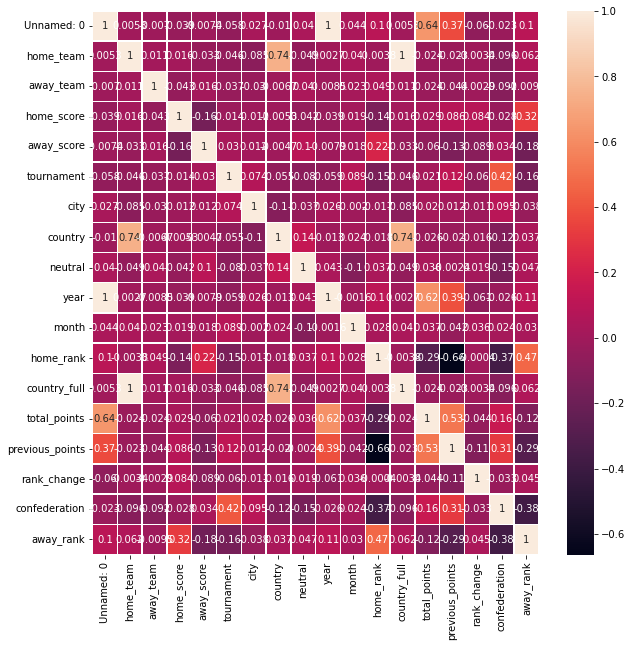

In [ ]:
#Create correlation matrix
corrmatrix = fifa.corr()
corrmatrix
#visualizing correlation matrix
fig, ax = plt. subplots(figsize=(10,10))
sns.heatmap(corrmatrix, annot=True, linewidth=.5, ax=ax)

## Feature engineering

#### Creating Additional Columns 

In [ ]:
# We will create a column that gives the difference in goals between the home team and the away team

fifa['goal_difference'] = fifa.home_score - fifa.away_score



In [ ]:
# We will also create a column that classifies the match outcome as either a win, loss or a draw with regards to the home team

x = fifa.home_score - fifa.away_score

def match_outcome(x):
  if x > 0:
    return 'Win'
  elif x < 0:
    return 'Loss'
  else:
    return 'Draw'

# creating a new column to give the match oucome
fifa['match_result'] = fifa.goal_difference.apply(lambda x: match_outcome(x))

In [ ]:
# Creating a new column to give the type of tournament

def tourn_type(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

fifa['tournament_type'] = fifa.tournament.apply(lambda x: tourn_type(x))

#### Label Encoding Categorical Data

In [ ]:
#we first convert categorical data to numerical data 
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
fifa['home_team'] = en.fit_transform(fifa['home_team'])
fifa['away_team'] = en.fit_transform(fifa['away_team'])
fifa['tournament'] = en.fit_transform(fifa['tournament'])
fifa['city'] = en.fit_transform(fifa['city'])
fifa['country'] = en.fit_transform(fifa['country'])
fifa['neutral'] = en.fit_transform(fifa['neutral'])
fifa['country_full'] = en.fit_transform(fifa['country_full'])
fifa['confederation'] = en.fit_transform(fifa['confederation'])

#### Checking for Multicollinearity

In [ ]:
# Finding the correlation between variables
#

fifa_corr = fifa.corr()
fifa_corr

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,total_points,previous_points,rank_change,confederation,away_rank,goal_difference
Unnamed: 0,1.000000,0.005343,-0.007045,-0.038778,-0.007434,-0.058019,0.027155,-0.010268,0.039571,0.997602,0.043649,0.101614,0.005343,0.636648,0.374877,-0.060036,-0.023427,0.102755,-0.024324
home_team,0.005343,1.000000,0.010507,0.016453,-0.032972,-0.046164,-0.084864,0.742668,-0.049281,0.002730,0.040293,-0.003779,1.000000,-0.024015,-0.023497,-0.003409,-0.095751,0.061865,0.030814
away_team,-0.007045,0.010507,1.000000,-0.043461,0.015856,-0.036701,-0.030215,-0.006707,0.039767,-0.008461,0.022965,0.049463,0.010507,-0.024248,-0.044367,-0.002863,-0.092037,-0.009547,-0.040982
home_score,-0.038778,0.016453,-0.043461,1.000000,-0.163449,-0.014192,-0.012332,-0.005259,-0.041618,-0.038735,0.018577,-0.135751,0.016453,0.029473,0.086176,0.084176,-0.028168,0.318369,0.828721
away_score,-0.007434,-0.032972,0.015856,-0.163449,1.000000,0.029795,0.012030,-0.004686,0.100754,-0.007922,0.018034,0.221458,-0.032972,-0.060140,-0.130546,-0.088782,0.033824,-0.180101,-0.687589
tournament,-0.058019,-0.046164,-0.036701,-0.014192,0.029795,1.000000,0.074426,-0.055282,-0.080260,-0.059185,0.088690,-0.146354,-0.046164,0.021385,0.119553,-0.059918,0.417717,-0.157194,-0.027348
city,0.027155,-0.084864,-0.030215,-0.012332,0.012030,0.074426,1.000000,-0.102104,-0.036554,0.025789,-0.002011,-0.016741,-0.084864,0.020470,0.012227,-0.010567,0.094653,-0.037616,-0.015901
country,-0.010268,0.742668,-0.006707,-0.005259,-0.004686,-0.055282,-0.102104,1.000000,0.140473,-0.013102,0.023702,-0.017866,0.742668,-0.026363,-0.020313,-0.015867,-0.116158,0.036950,-0.001212
neutral,0.039571,-0.049281,0.039767,-0.041618,0.100754,-0.080260,-0.036554,0.140473,1.000000,0.043224,-0.104829,0.037188,-0.049281,0.036269,-0.002373,0.018831,-0.152304,0.047499,-0.087788
year,0.997602,0.002730,-0.008461,-0.038735,-0.007922,-0.059185,0.025789,-0.013102,0.043224,1.000000,-0.001626,0.104435,0.002730,0.620286,0.390617,-0.060667,-0.026254,0.105708,-0.024015


## Implementing the Solution

## First Approach:

 Model 1 : Predicting the home team score

 Model 2 : Predicting the away team score

### Model 1 : Predicting the Home Score

#### Splitting train and test sets

In [ ]:
fifa.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'away_rank', 'goal_difference',
       'match_result', 'tournament_type'],
      dtype='object')

In [ ]:
fifa.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,total_points,previous_points,rank_change,confederation,away_rank,goal_difference,match_result,tournament_type
0,0,41,137,0,0,26,119,42,0,1993,8,19,41,0.0,36,16,3,67,0,Draw,Other
1,1,8,137,0,0,26,194,7,0,1993,8,5,8,0.0,51,5,3,67,0,Draw,Other
2,2,41,8,2,1,26,119,42,0,1993,8,19,41,0.0,36,16,3,5,1,Win,Other
3,3,138,8,0,1,26,636,148,0,1993,8,70,138,0.0,16,8,3,5,-1,Loss,Other
4,4,137,8,1,3,26,73,147,0,1993,8,67,137,0.0,22,1,3,5,-2,Loss,Other


In [ ]:
mycols = [col for col in fifa.columns if col not in ['home_score', 'away_score', 'date', 'tournament', 'city', 'country', 
                                                        'country_full', 'home_team', 'match_result', 'tournament_type',
                                                        'away_team']]

x = fifa[mycols]

y = fifa['home_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.3)

#### Normalization

In [ ]:
en = LabelEncoder()

In [ ]:
fifa['match_result'] = en.fit_transform(fifa['match_result'])
fifa['tournament_type'] = en.fit_transform(fifa['tournament_type'])

In [ ]:
fifa.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,total_points,previous_points,rank_change,confederation,away_rank,goal_difference,match_result,tournament_type
0,0,41,137,0,0,26,119,42,0,1993,8,19,41,0.0,36,16,3,67,0,0,0
1,1,8,137,0,0,26,194,7,0,1993,8,5,8,0.0,51,5,3,67,0,0,0
2,2,41,8,2,1,26,119,42,0,1993,8,19,41,0.0,36,16,3,5,1,2,0
3,3,138,8,0,1,26,636,148,0,1993,8,70,138,0.0,16,8,3,5,-1,1,0
4,4,137,8,1,3,26,73,147,0,1993,8,67,137,0.0,22,1,3,5,-2,1,0


In [ ]:
# Normalizing our data before running it through the model
#

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)
  

#### Feature Reduction using PCA

In [ ]:
# Applying PCA
  
pca = PCA()
  
x_train = pca.fit_transform(x_train)
  
x_test = pca.transform(x_test)


In [ ]:
# We now apply the number of components we desire to the PCA() function for reduction

pca = PCA(n_components = 10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#### Fitting the model

In [ ]:
# Fitting the polynomial linear regression

poly_features = PolynomialFeatures(include_bias = False, degree = 1)

x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# Training the model

linreg = LinearRegression()
linreg.fit(x_train, y_train)


LinearRegression()

#### Interpretting coefficients
> The coefficient of the variables allow us to model our equation with these particular values for our betas. We are able to extract the intercepts and coefficients using the linear regression variable. 

In [ ]:
# Prints y-intercept
print(linreg.intercept_)

# Prints the beta coefficients in order
print(linreg.coef_)

feature_columns =['neutral', 'year', 'month', 'home_rank',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'away_rank', 'goal_difference',
       'match_outcome', 'tournament_type']
# Zip can pair feature names as coefficients together
zip(feature_columns, linreg.coef_)

1.614604462474645
[-2.66652135e-04  4.00759853e-02  1.06452412e+00  1.10673769e-01
 -2.73346750e-01 -1.29216754e-01  2.67499661e-01 -2.82098523e-01
  6.32455590e-01  3.80885442e-01]


#### Predictions

In [ ]:
# Making predictions
#
y_pred = linreg.predict(x_test)

#### Evaluation of our model


In [ ]:
# We will use the rmse score to evaluate 

print('The rmse score is : ', np.sqrt(mean_squared_error(y_test, y_pred)))

The rmse score is :  0.9082061738545318


#### Checking for Heteroscedasticity

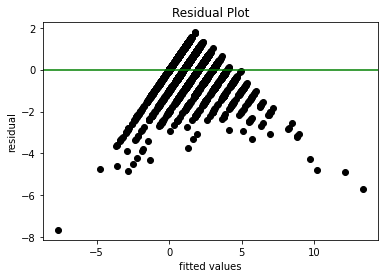

In [ ]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

### Model 2 : Predicting the Away Score

In [ ]:
# Splitting the dataset into train and test sets
#

mycols = [col for col in fifa.columns if col not in ['home_score', 'away_score', 'date','rank_date','tournament', 'city', 'country', 
                                                        'country_full', 'country_abrv', 'home_team', 
                                                        'away_team']]

X = fifa[mycols]
Y = fifa['away_score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 13, test_size = 0.3)

# Normalizing the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature reduction using PCA  
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# We now apply the number of components we desire to the PCA() function for reduction

pca = PCA(n_components = 13)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting the polynomial linear regression

poly_features = PolynomialFeatures(degree = 2)

X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model

regressor = LinearRegression(normalize = True )
regressor.fit(X_train, Y_train)

# Making predictions
#
Y_pred = regressor.predict(X_test)

  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


#### Interpretting Coefficients

In [ ]:
# Prints y-intercept
print(regressor.intercept_)

# Prints the beta coefficients in order
print(regressor.coef_)

feature_columns =['neutral', 'year', 'month', 'home_rank',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'away_rank', 'goal_difference',
       'match_outcome', 'tournament_type']
# Zip can pair feature names as coefficients together
zip(feature_columns, regressor.coef_)

-110388342992.68102
[ 3.00020491e+08 -1.54573329e+09 -1.48370832e+10  1.26505277e+10
 -9.32119229e+10 -4.41904535e+10  7.32354776e+10 -4.45022205e+10
 -9.14907101e+09 -1.97439663e+09 -1.31535074e+10 -5.57394583e+08
  8.37743153e+07 -2.52734641e+12  1.41198207e+07  2.71064814e+08
 -2.31117727e+08  1.70292720e+09  8.07333686e+08 -1.33796925e+09
  8.13029487e+08  1.67148165e+08  3.60710693e+07  2.40306872e+08
  1.01832724e+07 -1.53050720e+06  2.12911071e+11  1.30093956e+09
 -2.21843765e+09  1.63459457e+10  7.74938154e+09 -1.28428114e+10
  7.80405402e+09  1.60441083e+09  3.46236609e+08  2.30664181e+09
  9.77465256e+07 -1.46909358e+07  3.17131462e+09  9.45752163e+08
 -1.39370277e+10 -6.60734760e+09  1.09501537e+10 -6.65396294e+09
 -1.36796723e+09 -2.95211382e+08 -1.96670975e+09 -8.33415244e+07
  1.25259183e+07  3.20061247e+08  5.13455716e+10  4.86844177e+10
 -8.06831861e+10  4.90278900e+10  1.00794891e+10  2.17518361e+09
  1.44911582e+10  6.14079028e+08 -9.22937743e+07  4.15873587e+02
  1.1

#### Evaluating the results

In [ ]:
# We will use the rmse score to evaluate 

print('The rmse score is : ', np.sqrt(mean_squared_error(Y_test, Y_pred)))

The rmse score is :  0.6873821945831833


#### Checking for Heteroscedasticity

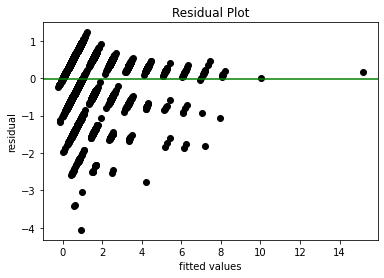

In [ ]:
residuals = Y_pred - Y_test

# Plotting the prediction errors

plt.scatter(Y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

### Approach 2 

Predicting whether a match played between two teams ends in a win, loss or a draw

#### Splitting the data into test and training sets

In [ ]:
fifa.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'away_rank', 'goal_difference',
       'match_result', 'tournament_type'],
      dtype='object')

In [ ]:
# Creating the train and test sets of our dataset

S = fifa.drop(['match_result', 'home_score', 'away_score','goal_difference'], axis = 1)
t = fifa.match_result

S_train, S_test, t_train, t_test = train_test_split(S, t, random_state = 3, test_size = 0.3)



#### Modeling the Logistic Regression

In [ ]:
#  Applying and training the model

logreg = LogisticRegression()
logreg.fit(S_train, t_train)

# Predicting the results

t_pred = logreg.predict(S_test)

# Evaluating the performance of the model
#
print('The accuracy of the model is',  accuracy_score(t_test, t_pred))
confusion_matrix(t_test, t_pred)


The accuracy of the model is 0.5621056782334385


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[  26,  367,  798],
       [  37,  758,  649],
       [  31,  339, 2067]])

In [ ]:
#Performing feature scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
model = LogisticRegression()

#Fitting the model:
model.fit(X_train,y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Predicting the value:
predictions = model.predict(X_test)

#Checking the accuracy:
print("Accuracy:",model.score(X_test, y_test ))

Accuracy: 0.543769716088328


our accuracy of 54% is less than the targetted 80%

#### Testing for Heteroscedasticity

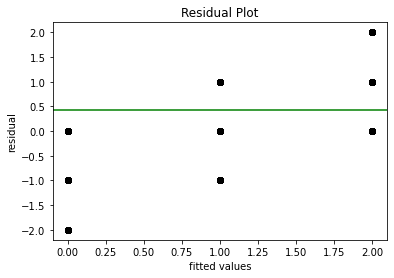

In [ ]:
residuals = t_pred - t_test

# Plotting the prediction errors

plt.scatter(t_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

#### cross validation

In [ ]:
fifa.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'away_rank', 'goal_difference',
       'match_result', 'tournament_type'],
      dtype='object')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

#picking the target and feature
X= fifa[["home_rank","away_rank","away_score","match_result"]].values
y= fifa["home_score"].values

folds = RepeatedKFold(n_splits=5, n_repeats=2)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] 
count = 0 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 10 folds
trained 10 models


1.287656246134461

## Challenging the solution

> - Fit other models to see if I can get better predictions


## Findings

> - Target variables are not normally distributed
> - Presence of outliers in both dependent and independent variables


## Conclusion

The models used cannot accurately predict the goals scored by either team as the accuracy registered is too low thus unreliable.


More data is recquired.



